# Titanic - Machine Learning Disaster
#### Serena Chang


This dataset is from [Kaggle](https://www.kaggle.com/c/titanic/overview). This notebook is structured in 3 parts: data exploration, data analysis, and data prediction.



### Data Exploration

The goal here is to check for data cleanliness and trends. I will also explore these questions:
1. Who are the passengers on the Titanic? (age, sex, where they are from)
2. Where were the passengers staying on the ship? (cabins, decks)
3. Which factors correlate with whether or not the passenger died?

In [42]:
# Import packages and data
import pandas as pd
import numpy as np
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('test.csv')

In [43]:
print(df.head())
print(df.info())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

In [20]:
print(df.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


#### Adding New Fields
1. HasCabin - Boolean for whether or not a passenger has a cabin
2. Status - "Employee"/"Guest" (Assumes passengers who did not pay fares are employees)

In [82]:
# Make the HasCabin field
df['Cabin'].fillna('None', inplace=True)
df['HasCabin'] = np.select([df['Cabin'] == 'None', df['Cabin'] != 'None'], [False, True])

df['status'] = np.select([(df['Fare'] == 0), (df['Fare'] > 0)], ['Employee', 'Guest'])
print(df.head(10))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked status  HasCabin  
0  34.5      0      0     330911   7.8292  

#### Initial Observations

All fields have all non-null values except for the Age, Cabin, and Fare fields. 
The Cabin field may have null values some passengers may not have stayed in a cabin.
Fares for some passengers were 0, perhaps because they were employees. We can look at the specific data.

In [28]:
pysqldf = lambda q: sqldf(q, globals())

age_q = pysqldf("select * from df where Age is null")
print(age_q.head)

<bound method NDFrame.head of     PassengerId  Pclass                                               Name  \
0           902       3                                   Ilieff, Mr. Ylio   
1           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
2           921       3                                  Samaan, Mr. Elias   
3           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
4           928       3                                Roth, Miss. Sarah A   
..          ...     ...                                                ...   
81         1300       3                    Riordan, Miss. Johanna Hannah""   
82         1302       3                             Naughton, Miss. Hannah   
83         1305       3                                 Spector, Mr. Woolf   
84         1308       3                                Ware, Mr. Frederick   
85         1309       3                           Peter, Master. Michael J   

       Sex   Age  SibSp  Parch   

{}


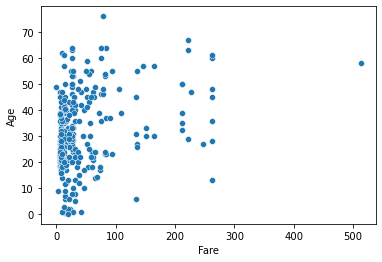

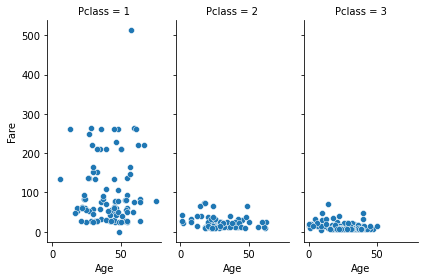

In [89]:
# Find out how many passengers in each ticket class did not have a cabin

cabin_q = pysqldf("select pclass from df where Cabin is null")
counts = dict()
for i in cabin_q.Pclass:
  counts[i] = counts.get(i, 0) + 1

print(counts)

# See the correlation between Fare and Age across ticket classes

sea = sns.FacetGrid(df, col = "Pclass",
                    height = 4, aspect  =.5)
  
sea.map(sns.scatterplot, "Age", "Fare")


It looks like there is an outlier in Fare of 512.33. Since this is far from the average fares within the first class tickets, I will replace that value with an average.